# K suave-r-1.0

In [5]:
using PyPlot

##### Ejecución del código en CUDA


```./float.out B-data/BceroSuave-r-1.0.dat electrodes.dat 4095```



In [4]:
k_suave_r1_nes = readdlm("KsNes/K-Nes-Suave-r-1.0.dat");

In [19]:
k_suave_r1_karel = readdlm("KsKarel/K_Suave_r-1.0-4095.dat");

In [6]:
k_suave_r1_nes

4095x4095 Array{Float64,2}:
 216186.0  222240.0  227814.0  232317.0  …  105882.0  104024.0  102135.0
 222240.0  229596.0  235045.0  239921.0     107772.0  105889.0  103977.0
 227814.0  235045.0  241831.0  246619.0     109619.0  107713.0  105776.0
 232317.0  239921.0  246619.0  252789.0     111414.0  109485.0  107526.0
 235754.0  243700.0  250811.0  256937.0     113153.0  111202.0  109220.0
 238197.0  246427.0  253917.0  260498.0  …  114834.0  112861.0  110857.0
 239748.0  248195.0  256003.0  263004.0     116458.0  114463.0  112437.0
 240528.0  249119.0  257176.0  264532.0     118024.0  116010.0  113963.0
 240650.0  249322.0  257552.0  265188.0     119535.0  117501.0  115435.0
 240227.0  248918.0  257253.0  265092.0     120994.0  118941.0  116854.0
 239356.0  248014.0  256391.0  264361.0  …  122401.0  120330.0  118224.0
 238121.0  246705.0  255069.0  263103.0     123758.0  121669.0  119546.0
 236595.0  245071.0  253379.0  261421.0     125067.0  122961.0  120820.0
      ⋮                

In [21]:
k_suave_r1_karel

4095x4095 Array{Float64,2}:
      4.32371e5  222240.0        …       1.04023e5       1.02135e5
 222240.0             4.59193e5          1.05889e5       1.03977e5
      2.27815e5       2.35046e5          1.07713e5       1.05777e5
 232317.0             2.39921e5          1.09485e5       1.07526e5
      2.35754e5  243700.0           111202.0             1.0922e5 
      2.38197e5       2.46427e5  …       1.12861e5       1.10857e5
      2.39748e5       2.48195e5          1.14463e5       1.12437e5
 240527.0             2.49119e5          1.16009e5       1.13963e5
      2.4065e5        2.49321e5          1.17501e5       1.15434e5
      2.40228e5       2.48918e5          1.18941e5       1.16854e5
      2.39356e5       2.48014e5  …       1.20329e5  118224.0      
      2.38121e5       2.46705e5          1.21669e5       1.19545e5
      2.36594e5       2.45071e5          1.22961e5       1.2082e5 
      ⋮                          ⋱                                
      1.20261e5  122340.0         

##### Dilema de la diagonal (Como es simétrica, aquí tenemos el valor sumado doblemente)

In [22]:
for j in 1:4095
    k_suave_r1_karel[j,j] = k_suave_r1_karel[j,j]/2
end

In [23]:
k_suave_r1_karel

4095x4095 Array{Float64,2}:
      2.16186e5  222240.0        …       1.04023e5       1.02135e5
 222240.0             2.29596e5          1.05889e5       1.03977e5
      2.27815e5       2.35046e5          1.07713e5       1.05777e5
 232317.0             2.39921e5          1.09485e5       1.07526e5
      2.35754e5  243700.0           111202.0             1.0922e5 
      2.38197e5       2.46427e5  …       1.12861e5       1.10857e5
      2.39748e5       2.48195e5          1.14463e5       1.12437e5
 240527.0             2.49119e5          1.16009e5       1.13963e5
      2.4065e5        2.49321e5          1.17501e5       1.15434e5
      2.40228e5       2.48918e5          1.18941e5       1.16854e5
      2.39356e5       2.48014e5  …       1.20329e5  118224.0      
      2.38121e5       2.46705e5          1.21669e5       1.19545e5
      2.36594e5       2.45071e5          1.22961e5       1.2082e5 
      ⋮                          ⋱                                
      1.20261e5  122340.0         

##### Gráfica de la K

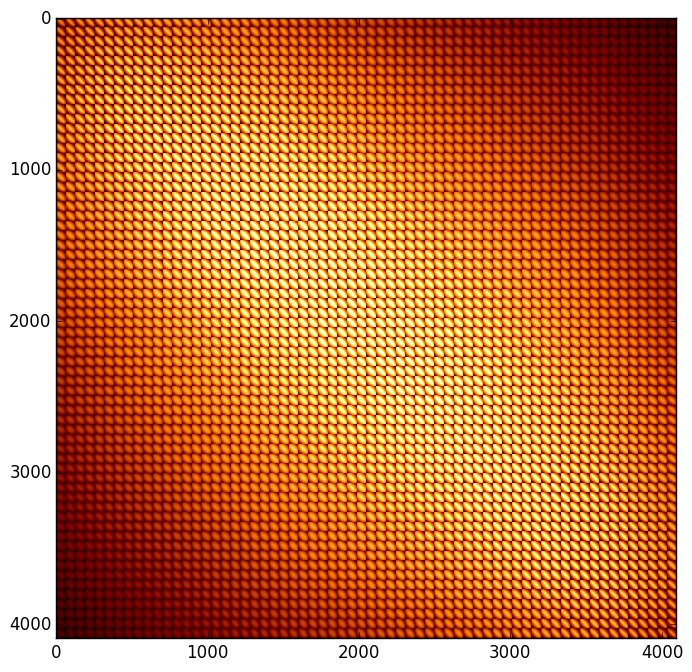

PyObject <matplotlib.image.AxesImage object at 0x3161b7290>

In [24]:
figure(figsize=(8,8))
lala = imshow(k_suave_r1_nes,interpolation="nearest",cmap="afmhot")

##### Error relativo promedio
http://mathworld.wolfram.com/RelativeError.html

In [43]:
error_mat = zeros(4095,4095);

In [63]:
error_calc = 0
for j in 1:4095
    for k in 1:4095
        error_mat[j,k] = ((k_suave_r1_nes[j,k]/k_suave_r1_karel[j,k]) - 1)
        error_calc += error_mat[j,k]
    end
end

In [64]:
error_calc/(4096*4096)

-4.9788890811796266e-9

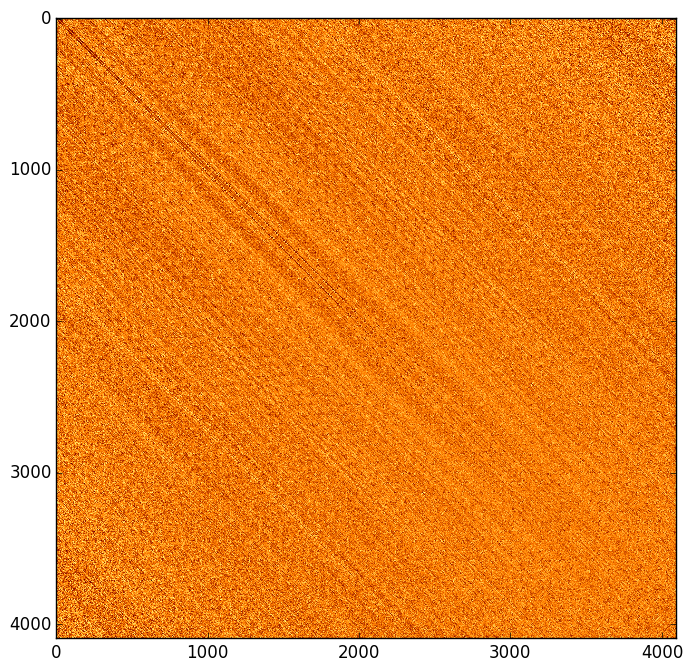

PyObject <matplotlib.image.AxesImage object at 0x349337790>

In [57]:
figure(figsize=(8,8))
lala2 = imshow(error_mat,interpolation="nearest",cmap="afmhot")

# K tilde suave-r-1.0